<a href="https://colab.research.google.com/github/PriyamNag/Large-Language-Model-using-Deep-Learning-NLP.github.io/blob/main/MLP_Words_Based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# dowload raw dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2024-02-12 22:20:53--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1115394 (1.1M) [text/plain]
Saving to: ‘input.txt’

input.txt           100%[===================>]   1.06M  --.-KB/s    in 0.05s   

2024-02-12 22:20:53 (20.2 MB/s) - ‘input.txt’ saved [1115394/1115394]



In [ ]:
# pre process the words present in the dataset
def pre_process(word):
  alphabets = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
  word = word.lower()
  newword = ''
  for char in word:
    if char in alphabets:
      newword += char

  return newword

In [ ]:
# loading the dataset
sentences = open('input.txt', 'r').read().splitlines()
words = []
for sentence in sentences:
  for word in sentence.split():
    words.append(pre_process(word))

words = list(set(words))
words = sorted(words)
words.remove('')

In [ ]:
# lookup tables to convert words to integers and vice-versa
stoi = {s: i+1 for i,s in enumerate(words)}
stoi['<E>'] = 0
itos = {i: s for s,i in stoi.items()}

In [ ]:
# building the dataset
block_size = 3          # context length: how many words do we take to predict the next one?

def build_dataset(sentences):
  X, Y = [], []
  for sentence in sentences:
    #print(sentence)
    context = [0] * block_size
    for word in sentence.split():
      word = pre_process(word)
      #print(word)
      if word == '':
        continue
      ix = stoi[word]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]  # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

import random
random.seed(42)
random.shuffle(sentences)
n1 = int(0.8*len(sentences))
n2 = int(0.9*len(sentences))

Xtr, Ytr = build_dataset(sentences[:n1])
Xdev, Ydev = build_dataset(sentences[n1:n2])
Xtest, Ytest = build_dataset(sentences[n2:])

torch.Size([162082, 3]) torch.Size([162082])
torch.Size([20417, 3]) torch.Size([20417])
torch.Size([20120, 3]) torch.Size([20120])


In [ ]:
# building the model
class MLP(nn.Module):
  def __init__(self):
    super().__init__()
    self.embedding = nn.Embedding(num_embeddings=12848, embedding_dim=300)
    self.layer_1 = nn.Linear(900,2000)
    self.activation_1 = nn.Tanh()
    self.layer_2 = nn.Linear(2000, 12848)
    self.softmax = nn.Softmax(dim=0)

  def forward(self, x):
    emb = self.embedding(x).flatten()
    logits = self.softmax(self.layer_2(self.activation_1((self.layer_1(emb)))))
    return logits

my_model = MLP()
print(my_model)

MLP(
  (embedding): Embedding(12848, 300)
  (layer_1): Linear(in_features=900, out_features=2000, bias=True)
  (activation_1): Tanh()
  (layer_2): Linear(in_features=2000, out_features=12848, bias=True)
  (softmax): Softmax(dim=0)
)


In [ ]:
embedding = nn.Embedding(num_embeddings=12848, embedding_dim=100)
x = Xtr[45]
emb = embedding(x).flatten()
layer1 = nn.Linear(300, 2000)
actv = nn.Tanh()
layer2 = nn.Linear(2000, 12848)
softmx = nn.Softmax(dim=0)

# feed forward
#softmx(layer2(actv(layer1((embedding(x).flatten()))))).shape

In [ ]:
# training the model
torch.manual_seed(42)
epoch = 1000
optimizer = torch.optim.SGD(my_model.parameters(), lr=0.1)
stepi, lossi = [], []
# put all data on target device
#Xtr, Ytr = Xtr.to(device), Ytr.to(device)
#Xtest, Ytest = Xtest.to(device), Ytest.to(device)

for i in range(epoch):
  # forward pass
  Y_pred = my_model(Xtr[i])
  loss = F.cross_entropy(Y_pred, Ytr[i])

  # backward pass
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  print(f"Epoch: {i} | Loss: {loss.item()}")

  stepi.append(i)
  lossi.append(loss.log10().item())

Epoch: 0 | Loss: 9.460962295532227
Epoch: 1 | Loss: 9.460966110229492
Epoch: 2 | Loss: 9.460901260375977
Epoch: 3 | Loss: 9.460938453674316
Epoch: 4 | Loss: 9.460962295532227
Epoch: 5 | Loss: 9.46090316772461
Epoch: 6 | Loss: 9.460931777954102
Epoch: 7 | Loss: 9.460962295532227
Epoch: 8 | Loss: 9.460953712463379
Epoch: 9 | Loss: 9.460977554321289
Epoch: 10 | Loss: 9.460930824279785
Epoch: 11 | Loss: 9.460929870605469
Epoch: 12 | Loss: 9.460939407348633
Epoch: 13 | Loss: 9.460945129394531
Epoch: 14 | Loss: 9.460953712463379
Epoch: 15 | Loss: 9.46094799041748
Epoch: 16 | Loss: 9.460931777954102
Epoch: 17 | Loss: 9.460958480834961
Epoch: 18 | Loss: 9.460930824279785
Epoch: 19 | Loss: 9.460977554321289
Epoch: 20 | Loss: 9.460923194885254
Epoch: 21 | Loss: 9.460952758789062
Epoch: 22 | Loss: 9.460938453674316
Epoch: 23 | Loss: 9.46095085144043
Epoch: 24 | Loss: 9.46091365814209
Epoch: 25 | Loss: 9.460918426513672
Epoch: 26 | Loss: 9.460956573486328
Epoch: 27 | Loss: 9.460945129394531
Epoch:

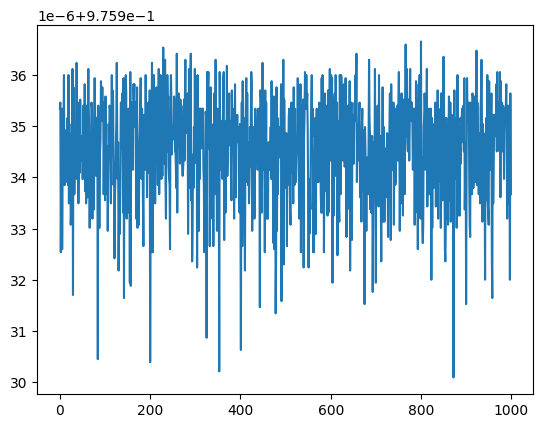

In [ ]:
plt.plot(stepi, lossi)

In [ ]:
# sampling from the model
g = torch.Generator()#.manual_seed(2147483647 + 10)

for i in range(20):
  print(f"sample {i+1}: ", end='')
  context = [0, 0, 0]
  len = 0
  while len < 20:
    probs = my_model(torch.tensor(context))
    ix = torch.multinomial(probs, num_samples=1, generator=g)
    print(itos[ix.item()], end=' ')
    context = context[1:] + [ix]
    len += 1
    if ix == 0:
      break
  print()

sample 1: top dateless wheresoever horror sob proved husbanded enforced brotherhood newst bowd impeachments pugging spouts plucking killd detect argue read holiday 
sample 2: between begged steeds capape oats totally delicates maintain excepting rides fancy unconstraind childrens cain rebeck eightyearold parchd allseeing amen fine 
sample 3: rumour unwittingly tressel mighty posture plaints heavenly barbary spilt beautywaning complainings tamingschool righthand wears cheerful gin devoted delay betrays volume 
sample 4: straind troublesome secretnurse debase disobeys heartplay boy memory wearing wield purple barbary plumes runnst repeald unbruised puts head hopeless mightst 
sample 5: overkind tombs washed trifle drinks dwelling shorter sudden cheekroses prevent nearer begun usual grudge alterd gentry henrys hay pupils annoyance 
sample 6: servingcreatures pipes slain freezeth exultation chamberlain giants disturbd tricks wellmeant posthaste whither rushcandle yes blossoming carriage os